<a href="https://colab.research.google.com/github/GraLesl/MAT-421/blob/main/ModuleE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conitinuity and Differentiation

Two important qualites of a function are wether its continuous and differentiable.

### Continuity

Continuity refers to the smoothness of a function. It is considered continuous if there are no abrubt changes in value. If f : D → R is a real function on D ⊆ $R_d$, then f is continous at a \in D if $lim_{(x→a)} f(x) = f(a)$.

### Differentiation

A functions derivative describes how rapidly the function changes with respect to a given variable. Notably, a function must be continuous for it to be differentiable.

### Taylors Theorem

One way to approximate a differentiable function is to use Taylor's Theorem. This theorem says that over a given range, we can estimate a function as a polynomial  given f : D → R where D ⊆ R and f has n number of continous derivatives in the range [a, b]:

$f(b) = ∑_{i=0}^{n} \frac{f^i (a)}{i!} (x-a)^i + h_k(x)(x-a)^k$

and

$lim_{x→a} h_k(x) = 0$


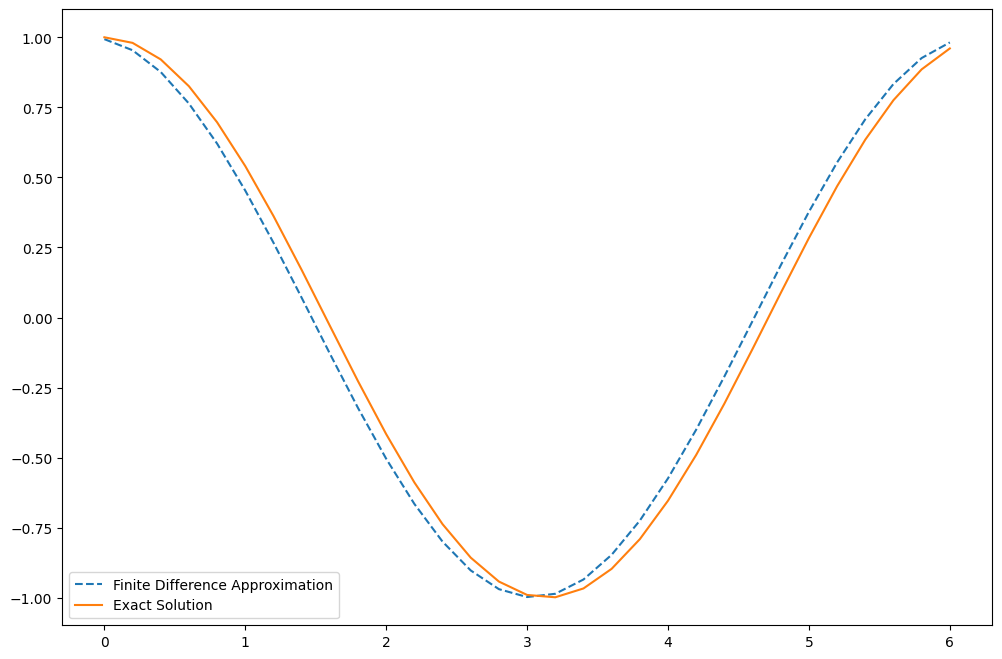

Maximum Error between function and approximation = 0.09978450092317373


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

h = 0.2
x = np.arange(0, 2*np.pi, h)
y = np.sin(x)

f_diff = np.diff(y)/h
x_diff = x[:-1:]
e_sol = np.cos(x_diff)

plt.figure(figsize = (12, 8))
plt.plot(x_diff, f_diff, '--', label = 'Finite Difference Approximation')
plt.plot(x_diff, e_sol,label = 'Exact Solution')
plt.legend()
plt.show()

err = max(abs(e_sol - f_diff))
print("Maximum Error between function and approximation = " + str(err))

## Unconstrained Optimization

Often times, it is desireable to find the unconstrained optimization of a function as the minimum of a given function. Even more desirable would be a global optimizer which can guarantee it has found the minimum over the functinos entire range. Unfortunatley, this can be very difficult, and as such we will look at a local optimizer which put simply, states the funciton at a given point increases when moved slightly left or right.

Gradient decent is one optimization algorithm to find a local minimum of a differentiable function.

In [ ]:
# gradient definition with arrays x and y
def ssr_gradient(x, y, b):
    res = b[0] + b[1] * x - y
    return res.mean(), (res * x).mean()

# algorithm for gradient descent that returns vector
def gradient_descent(
    gradient, x, y, start, learn_rate=0.1, n_iter=50, tolerance=1e-06
):
    vector = start
    for _ in range(n_iter):
        diff = -learn_rate * np.array(gradient(x, y, vector))
        if np.all(np.abs(diff) <= tolerance):
            break
        vector += diff
    return vector

# constructing arrays
x = np.array([5, 15, 25, 35, 45, 55])
y = np.array([5, 20, 14, 32, 22, 38])
# call gradient descent function with set arguments
gradient_descent(ssr_gradient,x,y,start=[0.5, 0.5], learn_rate=0.0008,n_iter=100_000,tolerance=1e-06)

array([5.62822349, 0.54012867])